In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline 

In [3]:
# pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

In [4]:
import os
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

## Configuration

### Input files and FE algorithms to be studied
0PU photon data are loaded

In [5]:
algo_files = {}
directory = 'Documents/FPGAs/'
fes = ['Threshold']

for fe in fes:
    algo_files[fe] = [ os.path.join(os.environ['HOME'], directory, 'data', 'gen_cl3d_tc.hdf5') ]

## Loading and preprocessing dataframes

In [6]:
algos_dfs = {}
for fe,files in algo_files.items():
    name = fe
    dfs = []
    for file in files:
        with pd.HDFStore(file, mode='r') as store:
            dfs.append(store[name])
    algos_dfs[fe] = pd.concat(dfs)
algo_names = sorted(algos_dfs.keys())

In [7]:
#Cleaning
df = algos_dfs['Threshold']
df = df[ df['genpart_exeta']>0 ]
df = df[ df['cl3d_eta']>0 ]

In [8]:
df['enres'] = ( df['genpart_energy']-df['cl3d_energy'] ) / df['genpart_energy']

In [9]:
nansel = pd.isna(df['enres']) 
nandf = df[nansel]
nandf['enres'] = 1.1
df = df[~nansel]
df = pd.concat([df,nandf], sort=False)
counts, edges = np.histogram(df['enres'].array, bins=500)
df

,genpart_exphi,genpart_exeta,genpart_energy,cl3d_energy,cl3d_pt,cl3d_eta,cl3d_phi,cl3d_layer_pt,deta,dphi,deltar,matches,best_match,tc_energy,tc_layer,tc_x,tc_y,tc_z,enres
event,,,,,,,,,,,,,,,,,,,
6,-2.164111,2.341516,118.596863,114.899307,21.918896,2.340630,-2.164777,"[0.0, 0.0, 0.5497400164604187, 1.4045708179473...",-0.000886,0.000667,0.001109,True,True,"[0.7811617851257324, 4.1374993324279785, 1.723...","[31, 15, 15, 15, 15, 15, 15, 11, 11, 11, 11, 1...","[-46.93809509277344, -36.49333953857422, -38.5...","[-73.43374633789062, -56.00122833251953, -54.8...","[378.5989990234375, 342.8927917480469, 342.892...",0.031178
11,-1.794445,2.438145,149.577072,133.970337,23.189684,2.439482,-1.797793,"[0.0, 0.0, 0.0, 1.017364501953125, 3.028297424...",0.001337,0.003348,0.003605,True,True,"[0.34478333592414856, 2.5858750343322754, 0.64...","[9, 9, 9, 9, 9, 9, 13, 13, 13, 13, 13, 13, 13,...","[-15.588239669799805, -13.507730484008789, -15...","[-55.200439453125, -58.80398941040039, -57.602...","[333.9827880859375, 333.9827880859375, 333.982...",0.104339
15,0.506733,2.755759,574.689270,533.757324,67.319183,2.759643,0.504902,"[0.0, 0.0, 0.04959961771965027, 1.398266553878...",0.003884,0.001830,0.004294,True,True,"[0.3232421278953552, 3.447916030883789, 0.3878...","[23, 23, 23, 23, 19, 21, 25, 25, 25, 11, 11, 1...","[43.01605224609375, 40.935550689697266, 36.774...","[19.705921173095703, 22.50868797302246, 20.106...","[354.7727355957031, 354.7727355957031, 354.772...",0.071224
25,-1.927717,1.569507,157.129150,149.436020,59.516373,1.571518,-1.927316,"[0.0, 0.0, 0.09941799193620682, 2.351156234741...",0.002011,0.000401,0.002050,True,True,"[0.18963538110256195, 0.6895666718482971, 9.92...","[17, 5, 7, 7, 7, 19, 19, 9, 9, 23, 23, 23, 23,...","[-52.709503173828125, -51.14911651611328, -51....","[-135.31192016601562, -133.8104248046875, -133...","[345.8627624511719, 328.0427551269531, 331.012...",0.048961
44,1.580725,3.021865,638.817078,629.842346,60.906776,3.026926,1.586767,"[0.0, 0.0, 0.0, 0.2359001636505127, 1.61810970...",0.005062,0.006042,0.007882,True,True,"[2.121419906616211, 1.515299916267395, 1.66682...","[29, 29, 29, 27, 27, 27, 27, 27, 27, 27, 11, 1...","[-0.23116779327392578, -0.23116779327392578, 3...","[37.467613220214844, 35.06524658203125, 37.868...","[367.6990051269531, 367.6990051269531, 367.699...",0.014049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199973,-1.267671,1.876786,194.567505,196.803818,58.795021,1.878199,-1.268202,"[0.0, 0.0, 0.15846391022205353, 2.498661756515...",0.001412,0.000531,0.001509,True,True,"[0.7280507683753967, 0.36238300800323486, 0.72...","[29, 19, 19, 19, 19, 19, 19, 17, 17, 17, 17, 1...","[33.14140701293945, 28.930389404296875, 30.490...","[-107.54037475585938, -105.109130859375, -103....","[367.6990051269531, 348.832763671875, 348.8327...",-0.011494
199988,0.565477,3.063222,977.593872,723.666748,67.537384,3.062612,0.587481,"[0.0, 0.0, 0.0415133498609066, 1.5798121690750...",-0.000610,0.022003,0.022012,True,True,"[0.25883880257606506, 1.5515621900558472, 0.64...","[13, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 2...","[89.66517639160156, 26.271957397460938, 26.271...","[7.293700218200684, 19.70592498779297, 14.9011...","[339.9227600097656, 354.7727355957031, 354.772...",0.259747
199992,-0.142678,2.648665,123.824074,107.551605,15.162086,2.647314,-0.141423,"[0.0, 0.0, 0.48546549677848816, 1.134449243545...",-0.001351,0.001255,0.001844,True,True,"[0.3016854226589203, 0.3877030611038208, 0.301...","[13, 11, 19, 19, 19, 19, 19, 15, 15, 15, 15, 1...","[53.518592834472656, 53.518592834472656, 45.84...","[-13.69999885559082, -13.69999885559082, -3.60...","[339.9227600097656, 336.9527587890625, 348.832...",0.131416


In [10]:
matplotlib.rcParams.update({'font.size': 11})
def plot_histo_quick(df1, df2, var, nbins=600):
    plt.figure(figsize=(12,4))
    plt.subplot(211)
    plt.hist(df1[var], bins=nbins)
    plt.grid()
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.subplot(221)
    plt.hist(df2[var], bins=nbins)
    plt.grid()
    plt.xlabel(var)
    plt.ylabel('Counts')
    plt.show()

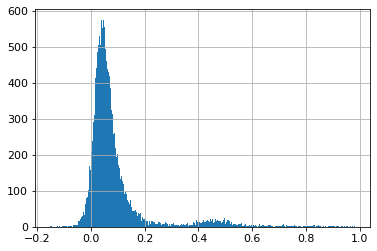

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df['enres'], bins=500)
plt.grid()
plt.show()

In [13]:
enrescut = 0.3
duplicated = df[ df['enres'] > enrescut ]
duplicated.columns

Index(['genpart_exphi', 'genpart_exeta', 'genpart_energy', 'cl3d_energy',
       'cl3d_pt', 'cl3d_eta', 'cl3d_phi', 'cl3d_layer_pt', 'deta', 'dphi',
       'deltar', 'matches', 'best_match', 'tc_energy', 'tc_layer', 'tc_x',
       'tc_y', 'tc_z', 'enres'],
      dtype='object')

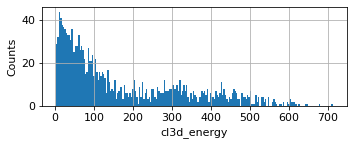

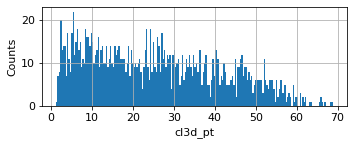

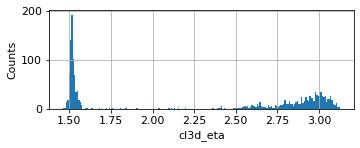

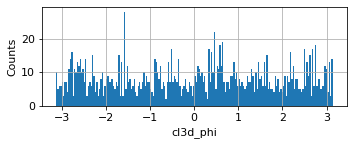

In [ ]:
for col in duplicated.columns:
    if 'cl3d' in col:
        plot_histo_quick(df, duplicated, var=col, nbins=200)